# Homework 2

**Author:** Christiaan van Roon - 11122854

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
import scipy.optimize as so
import matplotlib.mlab as mlab
import math

## Problem 1

### Question 1

In [2]:
seed = 276783

def randint(a, c, m):
    global seed
    seed = (a * seed + c ) % m
    return seed

In [3]:
def rand():
    number = randint(1664525, 1013904223, (2**32))
    return number / ((2**32))


def quantile(mu, sigma, p):
    return mu + sigma * math.sqrt(2) * sp.erfinv(2 * p -1)


def randnorm(mu, sigma):
    return quantile(mu, sigma, rand())


def randlognorm(mu, sigma):
    return np.exp(randnorm(mu, sigma))


print('Lets call the random generator a few times to see if it works: ')

for i in range(10):
    print('\t' + str(randlognorm(0, 1)))

Lets call the random generator a few times to see if it works: 
	1.01005536844
	1.10231355005
	0.836761893351
	0.383113429597
	3.92641267017
	0.556208710379
	0.222826504973
	0.439117501433
	0.444208237838
	0.676909308647


### Question 2

In [4]:
def percentile(values, alpha):
    values.sort()
    n = len(values) - 1
    return values[int(n*alpha)]

print("For percentile 0.95 of {1,4,5} without lineair interpolation: " + str(percentile([1,4,5], 0.95)))

For percentile 0.95 of {1,4,5} without lineair interpolation: 4


### Question 3

In [5]:
def lineair_percentile(values, alpha):
    values.sort()
    n = len(values)
    floor = math.floor(n*alpha)
    ceil = math.ceil(n*alpha)

    if floor == ceil:
        return values[int(n * alpha)]
    else:
        return (values[floor - 1] * (ceil - (n * alpha))) + (values[ceil - 1] * ((n * alpha) - floor))

print("For percentile 0.95 of {1,4,5} with lineair interpolation: " + str(lineair_percentile([1,4,5], 0.95)))

For percentile 0.95 of {1,4,5} with lineair interpolation: 4.85


### Question 4

In [70]:
def log_norm_pdf(mu, sigma, x):
    return (1 / (x  * sigma * math.sqrt(2 * math.pi))) * math.exp((-1 * (np.log(x) - mu) ** 2 / (2 * sigma ** 2)))

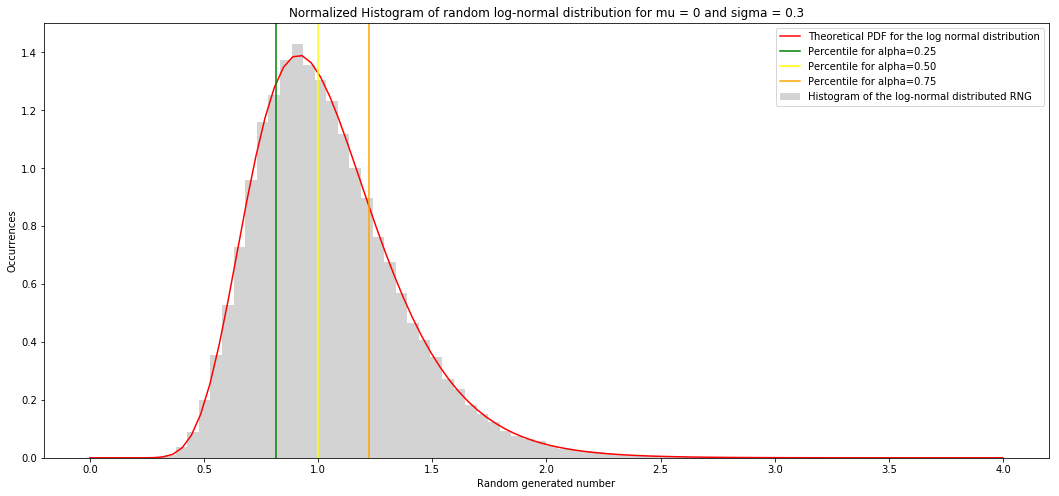

In [7]:
mu = 0
sigma = 0.3

x = [randlognorm(mu, sigma) for x in range(10**5)]

x_p1 = lineair_percentile(x, 0.25)
x_p2 = lineair_percentile(x, 0.50)
x_p3 = lineair_percentile(x, 0.75)

x1 = np.linspace(0.00001, 4, 100)
y1 = [log_norm_pdf(mu, sigma, i) for i in x1]

plt.figure(figsize=(18, 8))
plt.hist(x, 70, normed=True, color='#d3d3d3', label='Histogram of the log-normal distributed RNG')
plt.title('Normalized Histogram of random log-normal distribution for mu = ' + str(mu) + ' and sigma = ' + str(sigma))
plt.plot(x1, y1, label='Theoretical PDF for the log normal distribution', color='red')
plt.axvline(x=x_p1, color='Green', label='Percentile for alpha=0.25')
plt.axvline(x=x_p2, color='Yellow', label='Percentile for alpha=0.50')
plt.axvline(x=x_p3, color='Orange', label='Percentile for alpha=0.75')
plt.ylabel('Occurrences')
plt.xlabel('Random generated number')
plt.legend()
plt.show()

### Question 5

In [8]:
def log_norm_cdf(mu, sigma, x):
    return 0.5 + 0.5 * sp.erf((np.log(x) - mu) / (np.sqrt(2) * sigma))

def intersection(x, y, threshold):
    for idx, element in enumerate(y):
        if element > threshold and y[idx - 1] < threshold:
            return lineair_percentile([x[idx - 1], x[idx]], 0.5)
    return -1

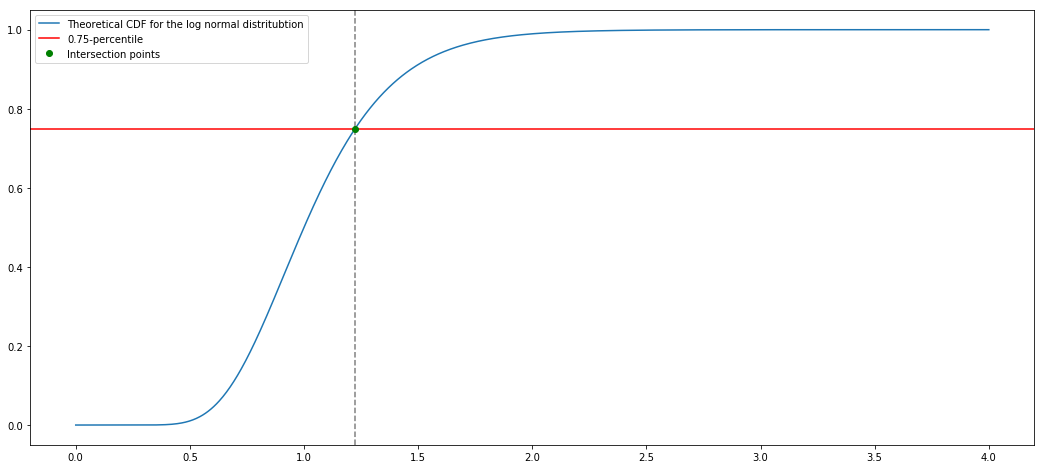

In [9]:
mu = 0.0
sigma = 0.3

x1 = np.linspace(0.00001, 4, 1000)
y2 = np.array([log_norm_cdf(mu, sigma, i) for i in x1])
        
intersect_y = intersection(x1, y2, 0.75)

plt.figure(figsize=(18, 8))
plt.plot(x1, y2, label='Theoretical CDF for the log normal distritubtion')
plt.axhline(y=0.75, label='0.75-percentile', color='red')
plt.axvline(x=intersect_y, linestyle='--', color='grey')
plt.plot(intersect_y, 0.75, 'go', label='Intersection points')
plt.legend()
plt.show()

It seems that the intersection of the line $y=0.75$ and the theoretical CDF is somewhere around the $x=1.3$. The probability of getting values less than x is the value of the CDF which is $0.75$

In [10]:
print('The intersection between the theoretical CDF and the horizontal line y = 0.75 is: ' + str(intersect_y))

The intersection between the theoretical CDF and the horizontal line y = 0.75 is: 1.22523216216


### Question 6

In [11]:
mu = 0
sigma = 0.3

sample_percentiles = []
for i in range(0, 10**4):
    x = [randlognorm(mu, sigma) for x in range(10**3)]
    sample_percentiles.append(lineair_percentile(x, 0.75))

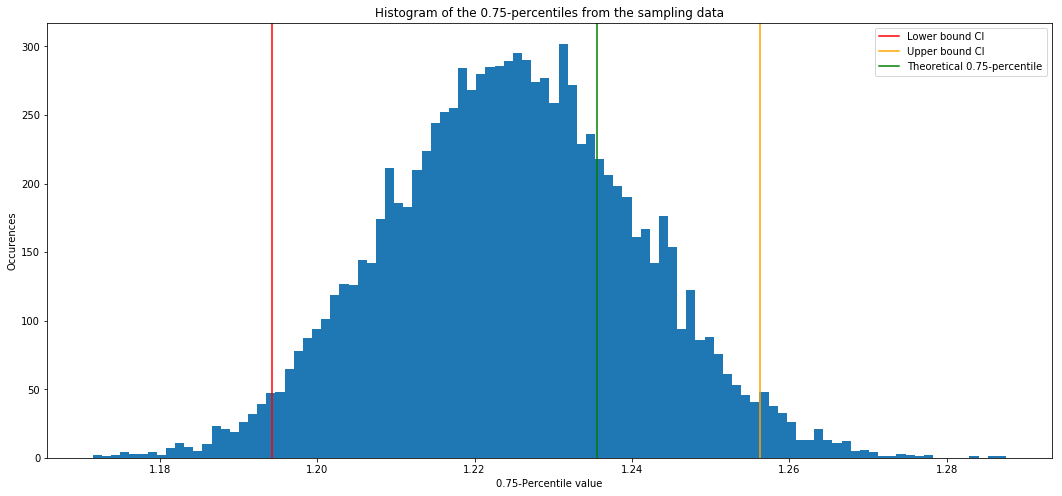

In [12]:
lower_bound = lineair_percentile(sample_percentiles, 0.025)
upper_bound = lineair_percentile(sample_percentiles, 0.975)
percentile = lineair_percentile(sample_percentiles, 0.75)

plt.figure(figsize=(18, 8))
plt.hist(sample_percentiles, 100)
plt.axvline(x = lower_bound, label='Lower bound CI', color='red')
plt.axvline(x = upper_bound, label='Upper bound CI', color='orange')
plt.axvline(x = percentile, label='Theoretical 0.75-percentile', color='green')
plt.legend()
plt.title('Histogram of the 0.75-percentiles from the sampling data')
plt.xlabel('0.75-Percentile value')
plt.ylabel('Occurences')
plt.show()

First we need to calculate the theoretical values for the upper and lower bounds of the Confidence interval. Using the 68-95-99.7 rule we know that the boundaries of a $95\%$ confidence interval are equal to: $[\mu - 2\sigma, \mu + 2\sigma]$. The python code below calculates the mean and standarddeviation

In [13]:
mean = sum(sample_percentiles) / len(sample_percentiles)
print('Mean: ' + str(mean))

stddev = np.sqrt(sum((sample_percentiles - mean)**2)/(len(sample_percentiles) - 1))
print('Standard deviation: ' + str(stddev))

Mean: 1.22478364771
Standard deviation: 0.0158930810604


And thus the boundaries of our confidence interval are equal to:$$[1.2248 - (2 \cdot 0.0159), 1.2248 + (2 \cdot 0.0159)]$$
$$=[1.193, 1.2566]$$
The values we computed using our samples are:

In [14]:
print('CI: [' + str(lower_bound) + ', ' + str(upper_bound) + ']')

CI: [1.19423265146, 1.2563131501]


And we see that our approximation of the confidence interval using a non-parametric approach is pretty accurate, in fact both boundaries are abaout $0.001$ off.  

### Question 7

Because we took a $95\%$ confidence interval we can say that the probability for $x$ being outside this confidence interval is $5\%$ is $P = 0.05$. Because the probability of a value $x$ being outside of the confidence interval is $P = 0.05$ and we do not reject the hypothesis when a value is inside our Confidence interval we can say that the probability of rejecting our $H_0$ would be $P=0.05$

### Question 8

Yes it is possible to make a valid statement about the expected probability because of the fact that we computed the CI based on the data that we had and we did not know 'anything' about the nature of the RNG. The data did not change in this situation, we only assume a different hypothesis is true.

### Question 9

As stated on the [site](http://wiki.analytica.com/index.php?title=How_to_Fit_a_Distribution_to_Data) linked in the assignment the value of the best-fit parameters for a normal distribution are just the sample mean and sample standard deviation, so to fit a normal distribution to a single sample we generate a sample and calculate these parameters:

In [15]:
sample_lognorm = [randlognorm(mu, sigma) for i in range(0, 10**3)]

sample_mean = sum(sample_lognorm) / len(sample_lognorm)
sample_stddev = np.sqrt(sum((sample_lognorm - sample_mean)**2)/(len(sample_lognorm) - 1))
print('The values of the parameters for the best-fit normal distribution are:\n\tmu: ' + str(sample_mean) + '\n\tsigma: ' + str(sample_stddev) + '\n')
print('An appropriate H_1 will then be: The sample is drawn from the normal distribution with mu = '+ str(sample_mean) + ' and\nsigma: ' + str(sample_stddev))

The values of the parameters for the best-fit normal distribution are:
	mu: 1.05282275953
	sigma: 0.317287571749

An appropriate H_1 will then be: The sample is drawn from the normal distribution with mu = 1.05282275953 and
sigma: 0.317287571749


 Now we have the values of the best-fit normal distribution, so we get $10^4$ data samples with $10^3$ data samples each.

In [16]:
sample_norm = []
for i in range(0, 10**4):
    x = [randnorm(sample_mean, sample_stddev) for x in range(10**3)]
    sample_norm.append(lineair_percentile(x, 0.75))

To visualize the 0.75-percentiles that the data sample from the normal RNG returns, we build a histogram in which we indicate the CI from the log-normal distribution. Then below we calculate the amount of 0.75-percentiles that lay in between the two boundaries of this CI.

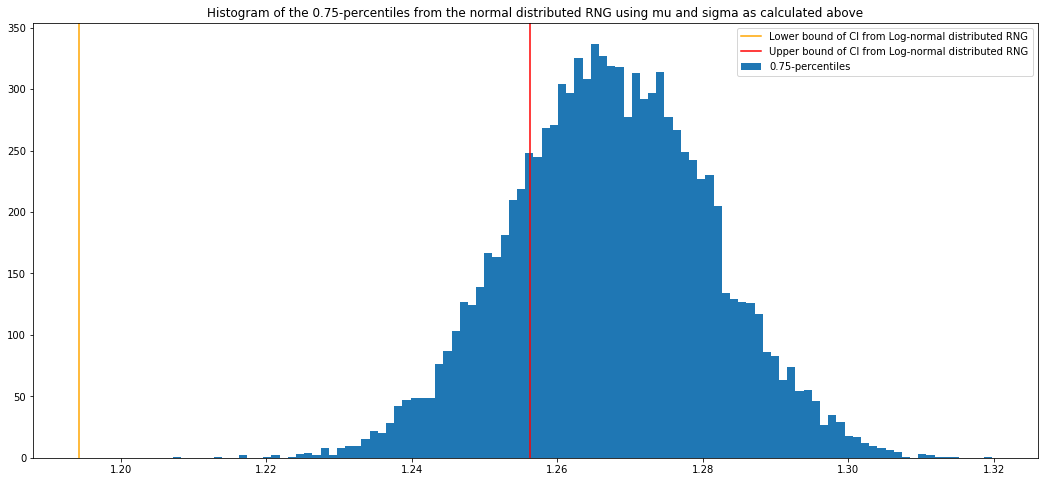

The amount of 0.75-percentiles that are in between the CI boundaries of the log-normal distribution: 2126
And thus the probability: 0.2126


In [17]:
plt.figure(figsize=(18, 8))
plt.title('Histogram of the 0.75-percentiles from the normal distributed RNG using mu and sigma as calculated above')
values, bins, patches = plt.hist(sample_norm, 100, label='0.75-percentiles')
plt.axvline(x = lower_bound, label='Lower bound of CI from Log-normal distributed RNG', color='orange')
plt.axvline(x = upper_bound, label='Upper bound of CI from Log-normal distributed RNG', color='red')
plt.legend()
plt.show()

amount_percentiles = 0
for value in sample_norm:
    if lower_bound <= value <= upper_bound:
        amount_percentiles += 1

        
print('The amount of 0.75-percentiles that are in between the CI boundaries of the log-normal distribution: ' + str(amount_percentiles))
print('And thus the probability: ' + str(amount_percentiles / len(sample_norm)))

### Question 10

|   |  $x$ in CI &nbsp; &nbsp; &nbsp;| $\neg$($x$ in CI)&nbsp;&nbsp;&nbsp;|
|---|---|------|
|$H_0$|$1 - \alpha$|$\alpha$|
|$\neg H_0$| $\beta$| $1-\beta$|

First let me explain what the values in this table mean. The top left cell represents the probability that we accept $H_0$ and that the value is in our CI. The value right next to it means exactly the opposit, so we accept $H_O$ but the value is outside the CI. When we move down a row, we do not accept $H_0$ and state the probabilities that our value is inside the CI. When filling in these variables we get the following table:

|   |  $x$ in CI &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;| $\neg$($x$ in CI)&nbsp;&nbsp;&nbsp; &nbsp; &nbsp;|
|---|---|------|
|$H_0$|$1 - 0.05 $|$ 0.05$|
|$\neg H_0$| $0.30$| $1-0.30$|

So the $\beta$ value represents the value that $H_0$ is not true and the value is in our CI.
  
In this case there are two possibilities: We have $H_0$ or we have $\neg H_0$, which means both have a probability of $0.5$ Now for each situation we can state a wrong conclusion. When we think that we have $H_0$ and the value is in our CI, we accept $H_0$ which is not true, so we have a $0.5 * 0.95 = 0.475$  chance on making this wrong decision. Then we have the situation that we think we have $\neg H_0$ and the value is not in our CI and thus we accept $H_0$, we have a chance of $0.5 * 0.3 = 0.15$ on making this wrong decision which results in a total probability on making the wrong decision of: $0.475 + 0.15 = 0.625$

### Question 11

In [18]:
mu = 0
sigma = 0.3

sample_percentiles = []
for i in range(0, 10**4):
    x = [randlognorm(mu, sigma) for x in range(10**3)]
    sample_percentiles.append(lineair_percentile(x, 0.5))
    

lower_bound = lineair_percentile(sample_percentiles, 0.25)
upper_bound = lineair_percentile(sample_percentiles, 0.75)

In [19]:
sample_norm = []
for i in range(0, 10**4):
    x = [randnorm(sample_mean, sample_stddev) for x in range(10**3)]
    sample_norm.append(lineair_percentile(x, 0.5))

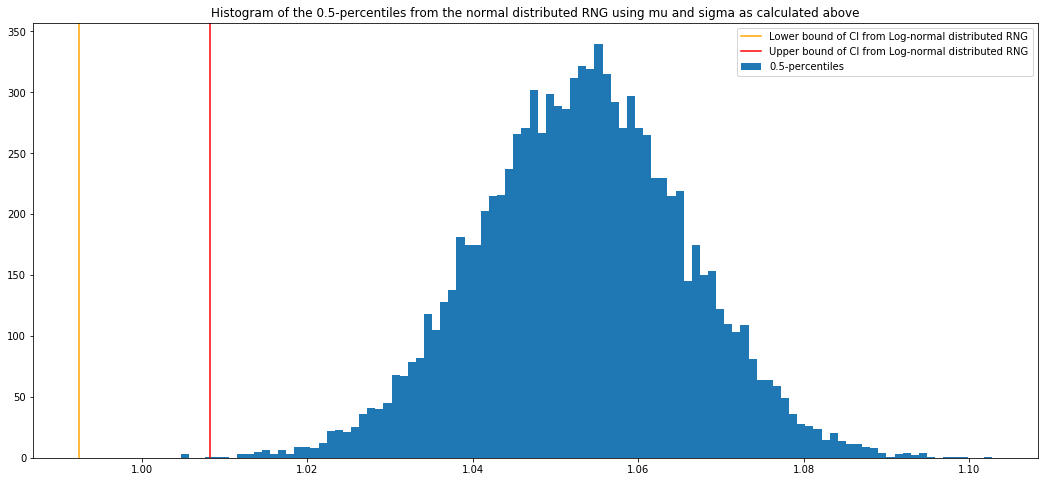

The amount of 0.5-percentiles that are in between the CI boundaries of the log-normal distribution: 3
And thus the probability: 0.0003


In [20]:
plt.figure(figsize=(18, 8))
plt.title('Histogram of the 0.5-percentiles from the normal distributed RNG using mu and sigma as calculated above')
values, bins, patches = plt.hist(sample_norm, 100, label='0.5-percentiles')
plt.axvline(x = lower_bound, label='Lower bound of CI from Log-normal distributed RNG', color='orange')
plt.axvline(x = upper_bound, label='Upper bound of CI from Log-normal distributed RNG', color='red')
plt.legend()
plt.show()

amount_percentiles = 0
for value in sample_norm:
    if lower_bound <= value <= upper_bound:
        amount_percentiles += 1

        
print('The amount of 0.5-percentiles that are in between the CI boundaries of the log-normal distribution: ' + str(amount_percentiles))
print('And thus the probability: ' + str(amount_percentiles / len(sample_norm)))

Which results in a total probability for making the wrong decision of: $0.95 * 0.5 + 0.5 * 0.0003 = 0.47515$ This is significantly lower than the previous total probability, in fact the difference is so big that it is important to choose the right statistic when needing reliable conclusions

### Question 12

To make clear that the two methods of statistical testing are the same, we first write down clearly how to interpret both resulting values. The confidence level represents the theoretical ability to produce accurate intervals if you are able to assess many intervals and know the value of the population parameter. The correct interpretation of the p-value is stated in the assignment. The significance level defines the distance the sample mean must be from the $H_0$ mean to be considered significant, while the confidence level defines the distance for how close the confidence limits are to the sample mean. Results are considered significant if the P-value is lower than the significance level, and the confidence interval will agree as it will only contain the $H_0$ mean if this is the case.

### Question 13

## Problem 2

### Question 1

When bootstrapping, we have data set of size N and we want some variability of the mean to check the inference of our population with our sample. We achieve this by sampling with replacement to get a sample of equal size N and estimating the mean of this sample. We repeat this process a lot of times and will be left with a histogram of estimated means. The shape of this histogram is starting to look like the original distribution. When making our initial population larger we get larger bootstrap samples and thus more accurate estimated means, which results in a more accurate shape of the histogram following the original distribution. In this 'visualized' way we showed that when pulling a single value from these estimated means approximately equals pulling a single value from the underlying distribution. A statistical test then becomes the same because we can retrieve some information about our underlying theoretical distribution.

### Question 2

Bootstrapping with replacement allows us to have a duplicate entry in the resulting entry which ensures us that no two samples are the same and represents cases in the underlying population that look a lot similar.

### Question 3

In [21]:
def normal_sample(n1, n2, mu, sigma):
    sample_means = []
    for _ in range(0, n1):
        x = [randlognorm(mu, sigma) for i in range(0, n2)]
        sample_means.append(np.mean(x))
    
    return sample_means

In [22]:
def bootstrap_sample(values):
    resample_i = np.floor(np.random.rand(len(values)) * len(values)).astype(int)
    values_resample = np.array(values[resample_i])
    return values_resample


def mean_bootstrap(values, N):
    sample_means = []
    for i in range(0, N):
        x = bootstrap_sample(values)
        sample_means.append(np.mean(x))
        
    return sample_means

In [23]:
mu = 0
sigma = 0.9

x = [randlognorm(mu, sigma) for i in range(0, 10**2)]

x1 = normal_sample(10**5, 10**2, mu, sigma)
x2 = mean_bootstrap(np.array(x), 10**5)

To fit a normal distribution to the bootstrap sample, we need to calculate its sample mean and sample standard deviation:

In [24]:
bootstrap_mean = sum(x2) / len(x2)
bootstrap_stddev = np.sqrt(sum((x2 - bootstrap_mean)**2)/(len(x2) - 1))
print('Mean of the bootstrap sample means = ' + str(bootstrap_mean))
print('Standard deviation of the bootstrap sample means = ' +str(bootstrap_stddev))

Mean of the bootstrap sample means = 1.36384992847
Standard deviation of the bootstrap sample means = 0.109632224294


In [25]:
def norm_pdf(mu, sigma, x):
    return (1 / np.sqrt(2 * np.pi * (sigma) ** 2)) * np.exp(-1 * (((x - mu) **2) / (2 * (sigma**2))))

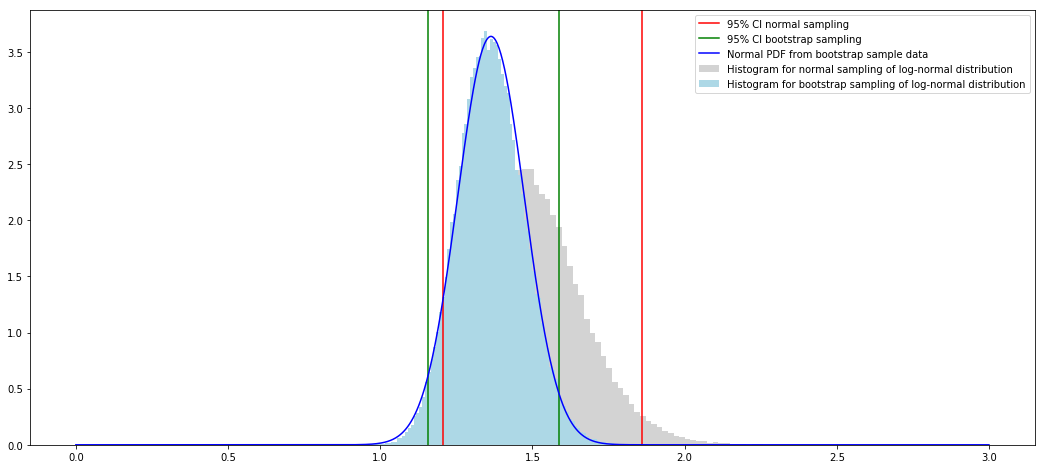

In [26]:
plt.figure(figsize=(18, 8))
plt.hist(x1, 100, normed=True, label='Histogram for normal sampling of log-normal distribution', color='#d3d3d3')
plt.hist(x2, 100, normed=True, label='Histogram for bootstrap sampling of log-normal distribution', color='#add8e6')

lower_bound_x1 = lineair_percentile(x1, 0.025)
upper_bound_x1 = lineair_percentile(x1, 0.975)

lower_bound_x2 = lineair_percentile(x2, 0.025)
upper_bound_x2 = lineair_percentile(x2, 0.975)

plt.axvline(x=lower_bound_x1, label='95% CI normal sampling', color='red')
plt.axvline(x=upper_bound_x1, color='red')
plt.axvline(x=lower_bound_x2, label='95% CI bootstrap sampling', color='green')
plt.axvline(x=upper_bound_x2, color='green')

x3 = np.linspace(0, 3, 1000)
y = [norm_pdf(bootstrap_mean, bootstrap_stddev, i) for i in x3]
plt.plot(x3, y, color='#0000ff', label='Normal PDF from bootstrap sample data')
plt.legend()
plt.show()

### Question 4

The Central Limit Theorem will work if we assume each randomly generated value from the data sample is independent of the other values in the sample. When we look at sample sizes up to infinity the CLT will hold for practically any distribution

### Question 5

A test statistic that cannot be described as a function applied to the mean is the 0.75-percentile of the sample set.

In [27]:
def percentile_bootstrap(values, N):
    sample_means = []
    for i in range(0, N):
        x = bootstrap_sample(values)
        sample_means.append(lineair_percentile(x, 0.75))
        
    return sample_means

def percentile_normal_sample(n1, n2, mu, sigma):
    sample_means = []
    for _ in range(0, n1):
        x = [randlognorm(mu, sigma) for i in range(0, n2)]
        sample_means.append(lineair_percentile(x,0.75))
    
    return sample_means

In [28]:
x1 = percentile_normal_sample(10**5, 10**2, mu, sigma)
x3 = percentile_bootstrap(np.array(x), 10**5)

bootstrap_mean = sum(x3) / len(x3)
bootstrap_stddev = np.sqrt(sum((x3 - bootstrap_mean)**2)/(len(x3) - 1))
print('Mean of the bootstrap sample percentiles = ' + str(bootstrap_mean))
print('Standard deviation of the bootstrap sample percentiles = ' +str(bootstrap_stddev))

Mean of the bootstrap sample means = 1.85125848408
Standard deviation of the bootstrap sample means = 0.197612897524


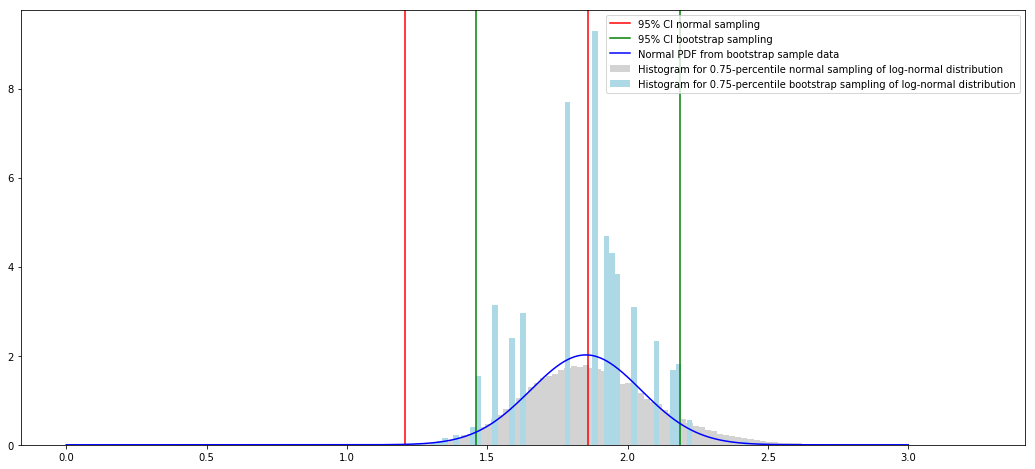

In [29]:
plt.figure(figsize=(18, 8))
plt.hist(x1, 100, normed=True, label='Histogram for 0.75-percentile normal sampling of log-normal distribution', color='#d3d3d3')
plt.hist(x3, 100, normed=True, label='Histogram for 0.75-percentile bootstrap sampling of log-normal distribution', color='#add8e6')

lower_bound_x3 = lineair_percentile(x3, 0.025)
upper_bound_x3 = lineair_percentile(x3, 0.975)

plt.axvline(x=lower_bound_x1, label='95% CI normal sampling', color='red')
plt.axvline(x=upper_bound_x1, color='red')
plt.axvline(x=lower_bound_x3, label='95% CI bootstrap sampling', color='green')
plt.axvline(x=upper_bound_x3, color='green')

x4 = np.linspace(0, 3, 1000)
y = [norm_pdf(bootstrap_mean, bootstrap_stddev, i) for i in x4]
plt.plot(x4, y, color='#0000ff', label='Normal PDF from bootstrap sample data')
plt.legend()
plt.show()

We can clearly see that the distribution of bootstrap sample by calculating the 0.75-percentile of each sample is different than a normal distribution.

### Question 6

When we look at the two distributions of the true and bootstrapped data for the mean test-statistic we can see that they look a lot like each other, there still are a few difference. The histogram for the normal sampled data is moved a bit to the right on the x-axis, which means it has a higher mean and thus a different CI. We also notice that the highest bin of the normal sampled data is lower than the highest bin from the bootstrap sampled data which means a more equally divided sample.

### Question 7

In [30]:
mu = 0
sigma = 0.9

x = [randlognorm(mu, sigma) for i in range(0, 2)]

x1 = normal_sample(10**5, 2, mu, sigma)
x2 = mean_bootstrap(np.array(x), 10**5)

In [31]:
bootstrap_mean = sum(x2) / len(x2)
bootstrap_stddev = np.sqrt(sum((x2 - bootstrap_mean)**2)/(len(x2) - 1))
print('Mean of the bootstrap sample means = ' + str(bootstrap_mean))
print('Standard deviation of the bootstrap sample means = ' +str(bootstrap_stddev))

Mean of the bootstrap sample means = 1.43269295897
Standard deviation of the bootstrap sample means = 0.843262252451


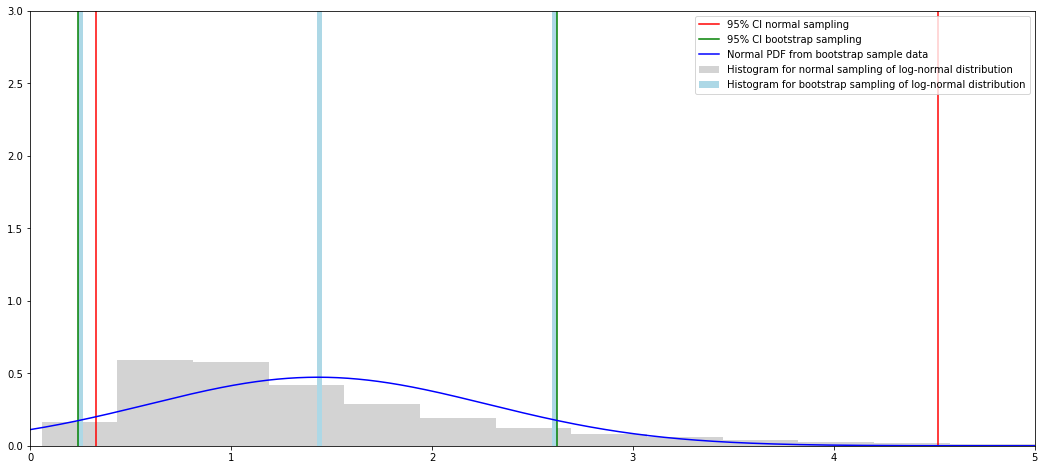

In [32]:
plt.figure(figsize=(18, 8))
plt.hist(x1, 100, normed=True, label='Histogram for normal sampling of log-normal distribution', color='#d3d3d3')
plt.hist(x2, 100, normed=True, label='Histogram for bootstrap sampling of log-normal distribution', color='#add8e6')

lower_bound_x1 = lineair_percentile(x1, 0.025)
upper_bound_x1 = lineair_percentile(x1, 0.975)

lower_bound_x2 = lineair_percentile(x2, 0.025)
upper_bound_x2 = lineair_percentile(x2, 0.975)

plt.axvline(x=lower_bound_x1, label='95% CI normal sampling', color='red')
plt.axvline(x=upper_bound_x1, color='red')
plt.axvline(x=lower_bound_x2, label='95% CI bootstrap sampling', color='green')
plt.axvline(x=upper_bound_x2, color='green')

x3 = np.linspace(0, 5, 1000)
y = [norm_pdf(bootstrap_mean, bootstrap_stddev, i) for i in x3]
plt.plot(x3, y, color='#0000ff', label='Normal PDF from bootstrap sample data')
plt.axis([0, 5, 0.0, 3])
plt.legend()
plt.show()

As we can clearly see this is not a good approximation anymore, the histogram of the bootstrapped sample consists of three different values which have a very high occurence. Because the sample set is so small the bootstrap sample with replacement has a high rate of recurrence.

### Question 8

In a case of an insufficient size of the dataset the approximation of the underlying distribution is not accurate anymore and thus hypothesis testing could end up giving wrong results, as we assume the population follows a totally different distribution.

### Question 9

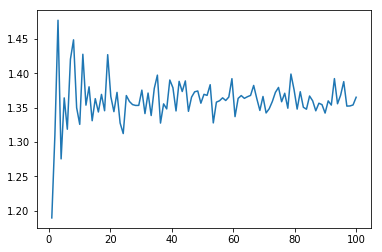

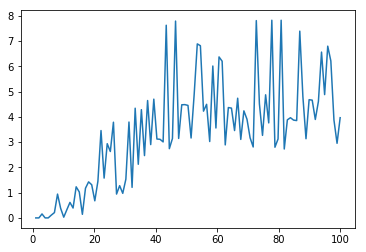

In [152]:
mu = 0
sigma = 0.9

def bootstrap_sample(values):
    resample_i = np.floor(np.random.rand(len(values)) * len(values)).astype(int)
    values_resample = np.array(values[resample_i])
    return values_resample

x = np.array([randlognorm(mu, sigma) for i in range(0, 10**2)])

sample_means = []
sample_ci = []

for i in range(1, 10**2):
    
    sample_means.append(np.mean(mean_bootstrap(x, i)))
    
    lower_bound = lineair_percentile(bootstrap_sample(x[:i]), 0.025)
    upper_bound = lineair_percentile(bootstrap_sample(x[:i]), 0.975)
    sample_ci.append(abs(lower_bound - upper_bound))
    
x = np.linspace(1, 10**2, 10**2-1)
plt.plot(x, sample_means)
plt.show()
plt.plot(x, sample_ci)
plt.show()

### Question 10

-

### Question 11

In [153]:
-

SyntaxError: invalid syntax (<ipython-input-153-60215a10e730>, line 1)

### Question 12

-